<a data-flickr-embed="true"  href="https://www.flickr.com/photos/157237655@N08/46466533461/in/datetaken-public/" title="Screen Shot 2018-12-25 at 7.32.35 PM"><img src="https://farm8.staticflickr.com/7876/46466533461_d18c10387a_b.jpg" width="512" height="488" alt="Screen Shot 2018-12-25 at 7.32.35 PM"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

This is the first blog post of [Object Detection with YOLO blog series](https://fairyonice.github.io/tag/object-detection-using-yolov2-on-pascal-voc2012-series.html).
The goal of this blog series is to understand the state-of-art object detection algorithm, called YOLO (you only look once). Allegedly, Andrew Ng mentioned that YOLO is the best object detection algorithm in his course. See the youtube video below:

In [1]:
import sys
print(sys.version)
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/6ykvU9WuIws?start=340", width=990/2, height=800/2)

3.6.3 |Anaconda, Inc.| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


While there are quite a few blog posts that discuss YOLO, many of them only discuss YOLOv2 and not YOLOv2, which is more powerful. I have seen many confused comments online about YOLOv2 partly because the paper does not discuss the defenition of the YOLO loss function explicitly (, and I was one of them). This blog series is **heavy** as I try to go over the YOLOv2 code line by line. 
I am doing this largely to keep track on my learning progress.
However, I hope that this series will also benefit someone who are eager to have complehensive understanding of YOLOv2 and want to implent YOLOv2 on your own. 

I will go into YOLO's input/output encoding procedure in [Part 2 Object Detection using YOLOv2 on Pascal VOC2012 - input and output encoding](https://fairyonice.github.io/Part%202_Object_Detection_with_Yolo_using_VOC_2014_data_input_and_output_encoding.html),
Then the model architecture will be discussed at: 
[Part 3 Object Detection using YOLOv2 on Pascal VOC2012 - model](https://fairyonice.github.io/Part_3_Object_Detection_with_Yolo_using_VOC_2012_data_model.html).
I will go over the YOLOv2's loss function line by line at: 
[Part 4 Object Detection using YOLOv2 on Pascal VOC2012 - loss](https://fairyonice.github.io/Part_4_Object_Detection_with_Yolo_using_VOC_2012_data_loss.html)
The model training scripts are available in - [Part 5 Object Detection using YOLOv2 on Pascal VOC2012 - training](https://fairyonice.github.io/Part_5_Object_Detection_with_Yolo_using_VOC_2012_data_training.html).
I will discuss and implement the prediction with the nonmax suppression at [Part 6 Object Detection using YOLOv2 on Pascal VOC 2012 data - inference on image](https://fairyonice.github.io/Part_6_Object_Detection_with_Yolo_using_VOC_2012_data_inference_image.html).
Finally, the trained modles are used for inference on video at [Part 7 Object Detection using YOLOv2 on Pascal VOC 2012 data - inference on video](https://fairyonice.github.io/Part_7_Object_Detection_with_Yolo_using_VOC_2012_data_inference_video.html).


## This blog post

The focus of this blog is to understand the distribution of the bounding box shape. 
The understanding of the bounding box shape distribution will later be very important to define "Anchor box" hyperparameters in Yolo training. 

### Anchor box
Conventionally, one of the biggest challenges in the object detection is to find multiple objects of various shapes within the same neighboorhood. For example, the picture below shows that a person is standing on a boat and hence the two objects are in the close vacinity. 

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/157237655@N08/46466533461/in/datetaken-public/" title="Screen Shot 2018-12-25 at 7.32.35 PM"><img src="https://farm8.staticflickr.com/7876/46466533461_d18c10387a_b.jpg" width="1024" height="976" alt="Screen Shot 2018-12-25 at 7.32.35 PM"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
Example: two objects (a person and a boat) are in close neighboorhood.

YOLO uses an idea of "Anchor box" to wisely detect multiple objects, lying in close neighboorhood.
YOLO's Anchor box requires users to predefine two hyperparameters: 
- (1) the number of anchor boxs and 
- (2) their shapes

so that multiple objects lying in close neighboorhood can be assigned to different anchor boxes. 

The more anchor boxes, the more objects YOLO can detect in a close neighboorhood with the cost of more parameters in deep learning model. 

What about shapes? For example, you may predefine that there are four anchor boxes, and their specializations are such that:

- the 1st anchor box specializes small flat rectangle bounding box
- the 2nd anchor box specializes small tall rectangle bounding box
- the 3rd anchor box specializes large flat rectangle bounding box
- the 4th anchor box specializes large tall rectangle bounding box

Then for the example image above, the anchor box 2 may captuers the person object and anchor box 3 may capture the boat. 

Clearly, it would be waste of anchor boxes if make an anchor box to specialize the bounding box shapes that rarely exist in data. 

In order to pre-specify the number of anchor boxes and their shapes, YOLOv2 proposes to use the K-means clustering algorithm on bounding box shape. This blog will run K-means algorithm on the VOC2012 dataset to find good hyperparameters for YOLO. Let's get started! 


## Reference
- [You Only Look Once:Unified, Real-Time Object Detection](https://arxiv.org/pdf/1506.02640.pdf) 

- [YOLO9000:Better, Faster, Stronger](https://arxiv.org/pdf/1612.08242.pdf)
 
- [experiencor/keras-yolo2](https://github.com/experiencor/keras-yolo2)

## Reference in my blog
- [Part 1 Object Detection using YOLOv2 on Pascal VOC2012 - anchor box clustering](https://fairyonice.github.io/Part_1_Object_Detection_with_Yolo_for_VOC_2014_data_anchor_box_clustering.html)
- [Part 2 Object Detection using YOLOv2 on Pascal VOC2012 - input and output encoding](https://fairyonice.github.io/Part%202_Object_Detection_with_Yolo_using_VOC_2014_data_input_and_output_encoding.html)
- [Part 3 Object Detection using YOLOv2 on Pascal VOC2012 - model](https://fairyonice.github.io/Part_3_Object_Detection_with_Yolo_using_VOC_2012_data_model.html)
- [Part 4 Object Detection using YOLOv2 on Pascal VOC2012 - loss](https://fairyonice.github.io/Part_4_Object_Detection_with_Yolo_using_VOC_2012_data_loss.html)
- [Part 5 Object Detection using YOLOv2 on Pascal VOC2012 - training](https://fairyonice.github.io/Part_5_Object_Detection_with_Yolo_using_VOC_2012_data_training.html)
- [Part 6 Object Detection using YOLOv2 on Pascal VOC 2012 data - inference on image](https://fairyonice.github.io/Part_6_Object_Detection_with_Yolo_using_VOC_2012_data_inference_image.html)
- [Part 7 Object Detection using YOLOv2 on Pascal VOC 2012 data - inference on video](https://fairyonice.github.io/Part_7_Object_Detection_with_Yolo_using_VOC_2012_data_inference_video.html)

## My GitHub repository 
This repository contains all the ipython notebooks in this blog series and the funcitons (See backend.py). 
- [FairyOnIce/ObjectDetectionYolo](https://github.com/FairyOnIce/ObjectDetectionYolo)

# Data
As in [the object detection using RCNN on PASCAL VOC2012 series](https://fairyonice.github.io/tag/object-detection-using-rcnn-on-pascal-voc2012-series.html), I will use PASCAL VOC2012 data. 

### PASCAL VOC2012
Data can be downloaded from [Visual Object Classes Challenge 2012 (VOC2012)](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html#data)

This data was [previously](https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_data_preparation_and_understanding.html) analyzed to demonstrate RCNN, one of the common object detection techiniques.
Please see [this blog](https://fairyonice.github.io/Object_detection_with_PASCAL_VOC2012_data_preparation_and_understanding.html)
for its descriptive statistics.
The data contains the following object classes:

In [2]:
LABELS = ['aeroplane',  'bicycle', 'bird',  'boat',      'bottle', 
          'bus',        'car',      'cat',  'chair',     'cow',
          'diningtable','dog',    'horse',  'motorbike', 'person',
          'pottedplant','sheep',  'sofa',   'train',   'tvmonitor']

I downloaded data at:

In [3]:
train_image_folder = "../ObjectDetectionRCNN/VOCdevkit/VOC2012/JPEGImages/"
train_annot_folder = "../ObjectDetectionRCNN/VOCdevkit/VOC2012/Annotations/"

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os, cv2
%matplotlib inline

To preprocess the annotations, I will use the pre-processing code  at [experiencor/keras-yolo2](https://github.com/experiencor/keras-yolo2).

In [5]:
import xml.etree.ElementTree as ET

def parse_annotation(ann_dir, img_dir, labels=[]):
    '''
    output:
    - Each element of the train_image is a dictionary containing the annoation infomation of an image.
    - seen_train_labels is the dictionary containing
            (key, value) = (the object class, the number of objects found in the images)
    '''
    all_imgs = []
    seen_labels = {}
    
    for ann in sorted(os.listdir(ann_dir)):
        if "xml" not in ann:
            continue
        img = {'object':[]}

        tree = ET.parse(ann_dir + ann)
        
        for elem in tree.iter():
            if 'filename' in elem.tag:
                path_to_image = img_dir + elem.text
                img['filename'] = path_to_image
                ## make sure that the image exists:
                if not os.path.exists(path_to_image):
                    assert False, "file does not exist!\n{}".format(path_to_image)
            if 'width' in elem.tag:
                img['width'] = int(elem.text)
            if 'height' in elem.tag:
                img['height'] = int(elem.text)
            if 'object' in elem.tag or 'part' in elem.tag:
                obj = {}
                
                for attr in list(elem):
                    if 'name' in attr.tag:
                        
                        obj['name'] = attr.text
                        
                        if len(labels) > 0 and obj['name'] not in labels:
                            break
                        else:
                            img['object'] += [obj]
                            
                        

                        if obj['name'] in seen_labels:
                            seen_labels[obj['name']] += 1
                        else:
                            seen_labels[obj['name']]  = 1
                        

                            
                    if 'bndbox' in attr.tag:
                        for dim in list(attr):
                            if 'xmin' in dim.tag:
                                obj['xmin'] = int(round(float(dim.text)))
                            if 'ymin' in dim.tag:
                                obj['ymin'] = int(round(float(dim.text)))
                            if 'xmax' in dim.tag:
                                obj['xmax'] = int(round(float(dim.text)))
                            if 'ymax' in dim.tag:
                                obj['ymax'] = int(round(float(dim.text)))

        if len(img['object']) > 0:
            all_imgs += [img]
                        
    return all_imgs, seen_labels

## Parse annotations 
train_image, seen_train_labels = parse_annotation(train_annot_folder,train_image_folder, labels=LABELS)
print("N train = {}".format(len(train_image)))

N train = 17125


#### Output : train_image
- Each element of the train_image is a dictionary containing the annoation infomation of an image.

In [6]:
train_image[:2]

[{'filename': '../ObjectDetectionRCNN/VOCdevkit/VOC2012/JPEGImages/2007_000027.jpg',
  'height': 500,
  'object': [{'name': 'person',
    'xmax': 349,
    'xmin': 174,
    'ymax': 351,
    'ymin': 101}],
  'width': 486},
 {'filename': '../ObjectDetectionRCNN/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg',
  'height': 281,
  'object': [{'name': 'aeroplane',
    'xmax': 375,
    'xmin': 104,
    'ymax': 183,
    'ymin': 78},
   {'name': 'aeroplane', 'xmax': 197, 'xmin': 133, 'ymax': 123, 'ymin': 88},
   {'name': 'person', 'xmax': 213, 'xmin': 195, 'ymax': 229, 'ymin': 180},
   {'name': 'person', 'xmax': 44, 'xmin': 26, 'ymax': 238, 'ymin': 189}],
  'width': 500}]

#### Visualize output : seen_train_labels

- seen_train_labels is the dictionary containing 
  -  (key, value) = (the object class, the number of objects found in the images)

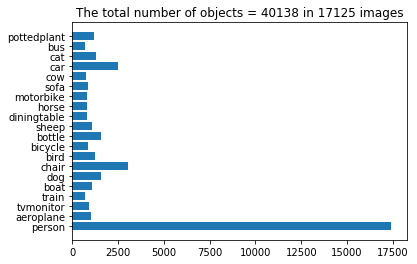

In [7]:
y_pos = np.arange(len(seen_train_labels))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.barh(y_pos,list(seen_train_labels.values()))
ax.set_yticks(y_pos)
ax.set_yticklabels(list(seen_train_labels.keys()))
ax.set_title("The total number of objects = {} in {} images".format(
    np.sum(list(seen_train_labels.values())),len(train_image)
))
plt.show()

## Parepare (width, height) data for K-means clustering

[YOLO9000:Better, Faster, Stronger](https://arxiv.org/pdf/1612.08242.pdf) suggests to use clustering on bounding box shape to find the good anchor box specialization suited for the data. Here is a quote from the paper: 

<blockquote>
Dimension Clusters:
we encounter two issues with anchor boxes when using them with YOLO.
The first is that the box dimensions are hand picked. 
the network can learn to adjust the boxes appropriately but if we pick better priors for the network to start with, we can make it easier for the network to learn to predict good detections.
</blockquote>
<blockquote>
Instead of choosing priors by hand, we run k-means clustering on the training set bounding boxes to automatically find good priors. If we use standard k-means with Euclidean distance learger boxes generate more error than smaller boxes. However, what we really want are priros that lead to good IOU scores, which is indepedndent of the size of the box. Thus for our distance metric we use 1 - IOU(box,centroid)
</blockquote>
So let's first prepare feature data for K-means clustering.
The data contain width and height as its features.
I will standardize the bounding box width and hight with its image width and height as the image width and height differ across images.

In [8]:
wh = []
for anno in train_image:
    aw = float(anno['width'])  # width of the original image
    ah = float(anno['height']) # height of the original image
    for obj in anno["object"]:
        w = (obj["xmax"] - obj["xmin"])/aw # make the width range between [0,GRID_W)
        h = (obj["ymax"] - obj["ymin"])/ah # make the width range between [0,GRID_H)
        temp = [w,h]
        wh.append(temp)
wh = np.array(wh)
print("clustering feature data is ready. shape = (N object, width and height) =  {}".format(wh.shape))

clustering feature data is ready. shape = (N object, width and height) =  (40138, 2)


## Visualize the clustering data
It is hard to see if there is any clearly separated clusters. 

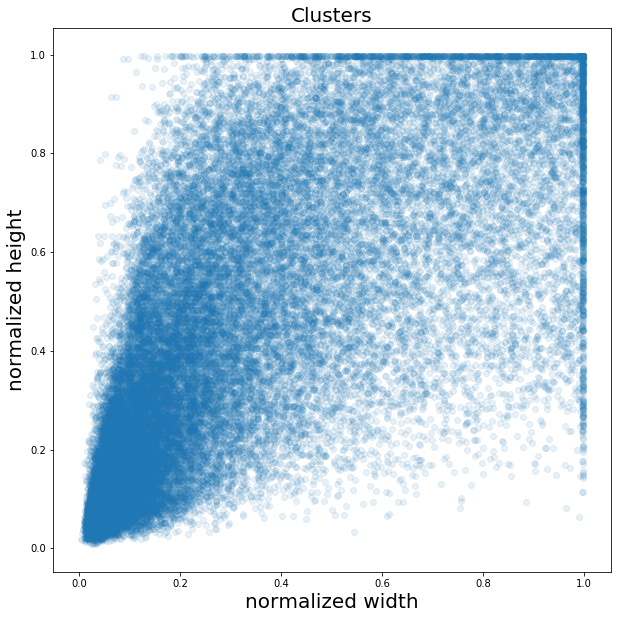

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(wh[:,0],wh[:,1],alpha=0.1)
plt.title("Clusters",fontsize=20)
plt.xlabel("normalized width",fontsize=20)
plt.ylabel("normalized height",fontsize=20)
plt.show()

# Intersection over union
The k-means clustering for finding the ideal anchor box specialization is well discussed with working code at [k-means clustering for anchor boxes](https://lars76.github.io/object-detection/k-means-anchor-boxes/#references). 
I feel that it is redundant to discuss the details here. So I want readers to read through this great short post.

The bounding boxes are often defined by 4 parameters: (xmin,ymin, width, height).
When we calculate IoU between two bounding boxes, all we care is their width and height.
The coordinates of a bounding box, xmin and ymin, are not of concern as we want to only compare the shapes of the bounding boxes.

In otherwords, we can think that the xmin and ymin are shared by the two objects. See the picture below:

<img src="https://farm8.staticflickr.com/7813/46412972842_6d2af063e9_h.jpg" width="300" height="400" alt="bbx">
Then the IoU can be calculated in the usual way as: 
$$\begin{array}{rl}
IoU &= \frac{\textrm{intersection} }{
\textrm{union} - \textrm{intersection}
}\\
\textrm{intersection} &= Min(w_1,w_2)  Min(h_1,h_2)\\
\textrm{union} & = w_1 h_1 + w_2  h_2
\end{array}$$

The following code is taken from [k-means clustering for anchor boxes](https://lars76.github.io/object-detection/k-means-anchor-boxes/#references) and computes the IoU.

In [10]:
def iou(box, clusters):
    '''
    :param box:      np.array of shape (2,) containing w and h
    :param clusters: np.array of shape (N cluster, 2) 
    '''
    x = np.minimum(clusters[:, 0], box[0]) 
    y = np.minimum(clusters[:, 1], box[1])

    intersection = x * y
    box_area = box[0] * box[1]
    cluster_area = clusters[:, 0] * clusters[:, 1]

    iou_ = intersection / (box_area + cluster_area - intersection)

    return iou_

## The k-means clustering
The k-mean clustering has two simple steps:


Set the number of clusters and initialize the cluster centers

- Step 1: allocate each item to the closest cluster centers. 
- Step 2: calculate the cluster centers as mean (or median) of all the cases in the clusters.
Repeat steps 1 and 2 until the two consective iterations yield the same cluster centers. 

Note: 
- In Step 1, the distance to the cluster center is calculated using 1 - IOU
- In Step 2, I used median to calculate the cluster centers. 


The following code is mostly the same as  [k-means clustering for anchor boxes](https://lars76.github.io/object-detection/k-means-anchor-boxes/#references). 
The only change I made is the line 21 as lars76's code loop through the cases rather than the objects, which made the code substantially slower when N cases >> N clusters. 

In [11]:
def kmeans(boxes, k, dist=np.median,seed=1):
    """
    Calculates k-means clustering with the Intersection over Union (IoU) metric.
    :param boxes: numpy array of shape (r, 2), where r is the number of rows
    :param k: number of clusters
    :param dist: distance function
    :return: numpy array of shape (k, 2)
    """
    rows = boxes.shape[0]

    distances     = np.empty((rows, k)) ## N row x N cluster
    last_clusters = np.zeros((rows,))

    np.random.seed(seed)

    # initialize the cluster centers to be k items
    clusters = boxes[np.random.choice(rows, k, replace=False)]

    while True:
        # Step 1: allocate each item to the closest cluster centers
        for icluster in range(k): # I made change to lars76's code here to make the code faster
            distances[:,icluster] = 1 - iou(clusters[icluster], boxes)

        nearest_clusters = np.argmin(distances, axis=1)

        if (last_clusters == nearest_clusters).all():
            break
            
        # Step 2: calculate the cluster centers as mean (or median) of all the cases in the clusters.
        for cluster in range(k):
            clusters[cluster] = dist(boxes[nearest_clusters == cluster], axis=0)

        last_clusters = nearest_clusters

    return clusters,nearest_clusters,distances



## Run the k-means clustering codes with k = 2, 3, 4,...,11.
We need to decide how many anchor boxes we should create and the specialization of each anchor boxshapes. 
To find answer to these hyperparameter values, I will run k-means clustering for k = 2,3,...,11.

The more clusters, the larger mean IoU becomes. This is expected as in ultimate case, when k = N cases, then the mean IoU must be 1. 

In [12]:
kmax = 11
dist = np.mean
results = {}
for k in range(2,kmax):
    clusters, nearest_clusters, distances = kmeans(wh,k,seed=2,dist=dist)
    WithinClusterMeanDist = np.mean(distances[np.arange(distances.shape[0]),nearest_clusters])
    result = {"clusters":             clusters,
              "nearest_clusters":     nearest_clusters,
              "distances":            distances,
              "WithinClusterMeanDist": WithinClusterMeanDist}
    print("{:2.0f} clusters: mean IoU = {:5.4f}".format(k,1-result["WithinClusterMeanDist"]))
    results[k] = result

 2 clusters: mean IoU = 0.4646
 3 clusters: mean IoU = 0.5391
 4 clusters: mean IoU = 0.5801
 5 clusters: mean IoU = 0.6016
 6 clusters: mean IoU = 0.6253
 7 clusters: mean IoU = 0.6434
 8 clusters: mean IoU = 0.6595
 9 clusters: mean IoU = 0.6712
10 clusters: mean IoU = 0.6840


### Visualization of k-means results 

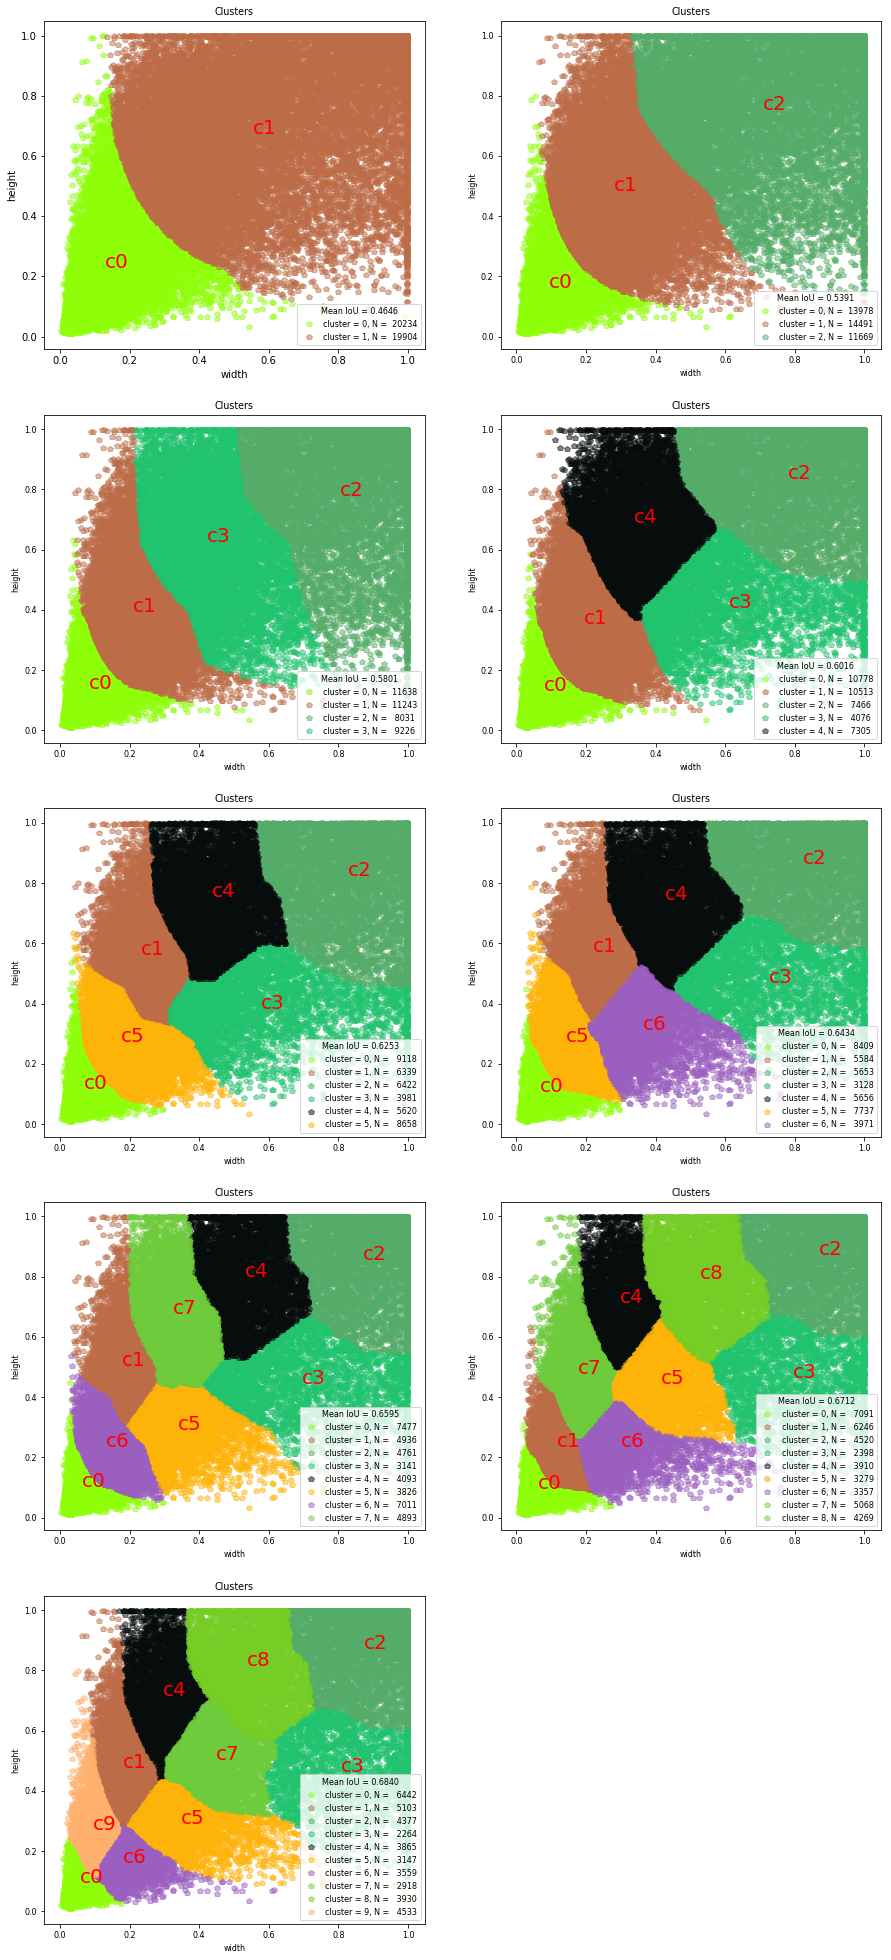

In [13]:
def plot_cluster_result(plt,clusters,nearest_clusters,WithinClusterSumDist,wh):
    for icluster in np.unique(nearest_clusters):
        pick = nearest_clusters==icluster
        c = current_palette[icluster]
        plt.rc('font', size=8) 
        plt.plot(wh[pick,0],wh[pick,1],"p",
                 color=c,
                 alpha=0.5,label="cluster = {}, N = {:6.0f}".format(icluster,np.sum(pick)))
        plt.text(clusters[icluster,0],
                 clusters[icluster,1],
                 "c{}".format(icluster),
                 fontsize=20,color="red")
        plt.title("Clusters")
        plt.xlabel("width")
        plt.ylabel("height")
    plt.legend(title="Mean IoU = {:5.4f}".format(WithinClusterSumDist))  
    
import seaborn as sns
current_palette = list(sns.xkcd_rgb.values())

figsize = (15,35)
count =1 
fig = plt.figure(figsize=figsize)
for k in range(2,kmax):
    result               = results[k]
    clusters             = result["clusters"]
    nearest_clusters     = result["nearest_clusters"]
    WithinClusterSumDist = result["WithinClusterMeanDist"]
    
    ax = fig.add_subplot(kmax/2,2,count)
    plot_cluster_result(plt,clusters,nearest_clusters,1 - WithinClusterSumDist,wh)
    count += 1
plt.show()

To make a decision on how many anchor boxes to use, Statisticians often like to see "elbow" curve, in this case, mean IoU vs N cluster plot. More sophisticated approach is to use [GAP statistics](https://statweb.stanford.edu/~gwalther/gap). 
The idea is that the true number of clusters is captuered when the increase in the mean IoU slope is "substantially" large. 
In this case, I would say that 4 anchor boxes may be a good size.

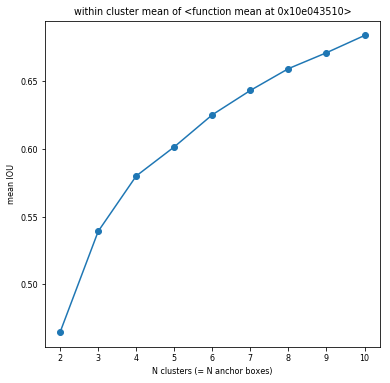

In [14]:
plt.figure(figsize=(6,6))
plt.plot(np.arange(2,kmax),
         [1 - results[k]["WithinClusterMeanDist"] for k in range(2,kmax)],"o-")
plt.title("within cluster mean of {}".format(dist))
plt.ylabel("mean IOU")
plt.xlabel("N clusters (= N anchor boxes)")
plt.show()


# The selected anchor box shapes
I select the four anchor boxes:
<table>
  <tr>
    <th>Anchor box ID</th>
    <th>width</th>
    <th>height</th>
    <th>comment</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0.08285376</td>
    <td>0.13705531</td>
    <th>tiny anchor box</th>
  </tr>
  <tr>
    <td>1</td>
    <td>0.20850361</td>
    <td>0.39420716</td>
    <th>small anchor box</th>
  </tr>
  <tr>
    <td>2</td>
    <td>0.80552421</td>
    <td>0.77665105</td>
    <th>large anchor box</th>
  </tr>
  <tr>
    <td>3</td>
    <td>0.42194719</td>
    <td>0.62385487</td>
    <th>medium anchor box</th>
  </tr>
</table>

The width and heights range between 0 and 1.

In [15]:
Nanchor_box = 4
results[Nanchor_box]["clusters"]

array([[0.08285376, 0.13705531],
       [0.20850361, 0.39420716],
       [0.80552421, 0.77665105],
       [0.42194719, 0.62385487]])

[FairyOnIce/ObjectDetectionYolo](https://github.com/FairyOnIce/ObjectDetectionYolo)
 contains this ipython notebook and all the functions that I defined in this notebook. 